$$CONCEITO:$$

- **Os atributos no topo da árvore são os mais importantes para descrever o comportamento da variável Target, seguindo uma ordem de importância**


- **Para construir uma árvore de decisão usamos 2 formulas importantes: Entropia e Índice de Gini, com elas você consegue descobrir quais variáveis são mais importantes para explicar a variável Target**


**Entropia:** 

- Quanto mais equilibrado os dados estiverem da variavel Target mais distante do valor 0 vai estar, lembrando que caso a arvore de decisão acerte todos os dados a entropia será 0


**Indice de Gini:** 

- Assim como na Entropia, será verificada a distribuição dos dados nas variáveis preditoras de acordo com a variação da variável target, A variável preditora com o menor índice Gini será a escolhida para o nó principal da árvore, pois um baixo valor do índice indica maior ordem na distribuição dos dados.


**Pruning:** 
    
- Eliminar alguns Nós da Árvore para evitar Overfitting


**Regra de Parada:**

- Os parâmetros usados para regra de parada são Índice Gini, Qui-Quadrado, Ganho de Informação e Redução de Variância



**Tipo de Distribuição:**

- Não Paramétrica




**Passo a Passo para construção da Árvore de decisão com índice gine:**

- **1° Calcular o valor da entropia da variável target**

- **2° Calcular o valor do índice gine da variável explicativa**

- **3° Verificar qual variável explicativa tem o menor índice gine para ser o nó raiz da árvore**

- **4° Após a escolha do nó raiz, repetir o passo 1 a 3 e escolher a próxima variável explicativa**


- **Obs:** Podem haver variáveis que tem o valor de gini alto, podendo ficar de fora da árvore


In [1]:
#Pacote
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carregar Banco de dados

In [2]:
# Carregando o dataset
dados = pd.read_csv('fraude.csv',encoding='latin1',sep=';')
dados.head(10)

,preco,horario,Classificacao
0,ate 3000,Noturno,Normal
1,ate 3000,Noturno,Normal
2,ate 3000,Noturno,Normal
3,ate 3000,Noturno,Normal
4,ate 3000,Noturno,Normal
5,ate 3000,Noturno,Normal
6,entre 3000 e 8000,Noturno,Fraude
7,entre 3000 e 8000,Noturno,Fraude
8,entre 3000 e 8000,Noturno,Fraude
9,entre 3000 e 8000,Noturno,Fraude


# Calcular a entropia da varáriavel target

In [3]:
# Calcular a Entropia da Varariavel Y


#Probabilidades de cada classe da variável Target
prob_class_norm = len(dados.loc[(dados['Classificacao'] =='Normal')])/len(dados)
prob_class_fraude = len(dados.loc[(dados['Classificacao'] =='Fraude')])/len(dados)


#Formula da Entropia na variável target
entropia_pai = ((-prob_class_norm*np.log2(prob_class_norm)-(prob_class_fraude*np.log2(prob_class_fraude))))


print(f'Probabilidade de Classificacao Normal  = {round(prob_class_norm,2)}')
print(f'Probabilidade de Classificacao Fraude = {round(prob_class_fraude,2)}')

print(f'\nValor da entropia da variável Target = {round(entropia_pai,2)}')


Probabilidade de Classificacao Normal  = 0.79
Probabilidade de Classificacao Fraude = 0.21

Valor da entropia da variável Target = 0.74


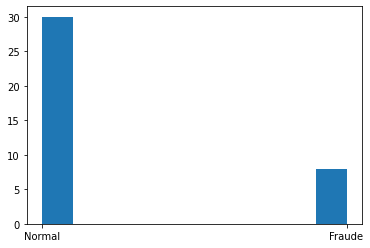

In [4]:
#Histograma
plt.hist(dados.Classificacao);

**Dados com a classe Normal predominante, entropia baixa**

# Cálculo do Índice Gini:

## 1° Passo: Calcular as probabilidade de cada classe da variável explicativa:

### Variável 'Preço'

In [5]:
#Divisão das classes

# Variavel Preço (entre 3000 e 8000) VS Target

# Quantidade de vezes que a classe fraude aparece na variavel preço da classe 'entre 3000 e 8000'
preco_3a8_fraud = len(dados.loc[(dados['preco'] =='entre 3000 e 8000')&(dados['Classificacao']=='Fraude')])
# Quantidade de vezes que a classe Normal aparece na variavel preço da classe 'entre 3000 e 8000'
preco_3a8_norm = len(dados.loc[(dados['preco'] =='entre 3000 e 8000')&(dados['Classificacao']=='Normal')])


# Variavel Preço classe 'ate 3000' VS Target

# Quantidade de vezes que a classe fraude aparece na variavel preço da classe 'ate 3000'
preco_3_fraud = len(dados.loc[(dados['preco'] =='ate 3000')&(dados['Classificacao']=='Fraude')])
# Quantidade de vezes que a classe Normal aparece na variavel preço da classe 'ate 3000'
preco_3_norm = len(dados.loc[(dados['preco'] =='ate 3000')&(dados['Classificacao']=='Normal')]) 

#Total de observações da variável preço
total_preco = len(dados)

print('Divisão das classes:\n')
print(f'Preço entre 3000 a 8000 e fraude = {preco_3a8_fraud}')
print(f'Preço entre 3000 a 8000 e Normal = = {preco_3a8_norm}')
print(f'\nPreço até 3000 e fraude = {preco_3_fraud}')
print(f'Preço até 3000 e normal = {preco_3_norm}')
print(f'\nTotal de amostras= {total_preco}')


Divisão das classes:

Preço entre 3000 a 8000 e fraude = 8
Preço entre 3000 a 8000 e Normal = = 10

Preço até 3000 e fraude = 0
Preço até 3000 e normal = 20

Total de amostras= 38


## 2° passo cálculo da impureza:


- **Indice Gini = 1 - (Classe_1 / Classe_1 + Classe_2)² - (Classe_2 / Classe_2 - Classe_1)²**

In [6]:
### Varariavel Preço entre 3000 e 8000

impureza_preco_3_8 = (1 - ((preco_3a8_fraud/(preco_3a8_fraud+preco_3a8_norm))**2) - 
                          ((preco_3a8_norm/(preco_3a8_fraud+preco_3a8_norm))**2))
print(f'Valor da Impureza da variavel Preço > 3000 = {impureza_preco_3_8}')

Valor da Impureza da variavel Preço > 3000 = 0.49382716049382713


In [7]:
### Varariavel Preço ate 3000
impureza_preco_3 = (1 - ((preco_3_fraud/(preco_3_fraud+preco_3_norm))**2) - 
                        ((preco_3_norm/(preco_3_norm+preco_3_fraud))**2))
print(f'Valor da Impureza da variavel Preço < 3000 = {impureza_preco_3}')

Valor da Impureza da variavel Preço < 3000 = 0.0


## 3° passo calcular o peso de cada classe da variável explicativa

In [8]:
#Tamanho das observações da classe 'entre 3000 e 8000'
total_3_8 = len(dados.loc[(dados['preco'] =='entre 3000 e 8000')])

#Total de observações
total_preco = len(dados)

#Formula
peso_total_3_8 = total_3_8/total_preco
peso_total_3_8




0.47368421052631576

In [9]:
#Tamanho das observações da classe 'ate 3000'
total_3 = len(dados.loc[(dados['preco'] =='ate 3000')])


#Total de observações
total_preco = len(dados)

#Formula
peso_total_3 = total_3/total_preco
peso_total_3


0.5263157894736842

## 4° passo calcular o Índice Gini da variável 'preco'

- **impureza de gini = (peso_classe1 * impureza_var_categ1)  + (peso_classe2 * impureza_var_categ2)**

In [10]:
#Impureza do indice gini
imp_gin_preco = (peso_total_3_8 * impureza_preco_3_8) + (peso_total_3 * impureza_preco_3)

imp_gin_preco= round(imp_gin_preco,2);imp_gin_preco
print(f'Impureza de gini da variavel Preço = {imp_gin_preco} ')

Impureza de gini da variavel Preço = 0.23 


# Cálculo do Índice Gini para variável 'horario':

## 1° Passo: Calcular as probabilidade de cada classe da variável explicativa:

In [11]:
#Divisão das classes

# Variavel Preço Horario Noturno VS Target

# Quantidade de vezes que a classe fraude aparece na variavel horario da classe Noturno
hor_not_fraud = len(dados.loc[(dados['horario'] =='Noturno')&(dados['Classificacao']=='Fraude')])
# Quantidade de vezes que a classe Normal aparece na variavel horario da classe Noturno
hor_not_norm = len(dados.loc[(dados['horario'] =='Noturno')&(dados['Classificacao']=='Normal')])

# Variavel  Horario Diurno VS Target

# Quantidade de vezes que a classe fraude aparece na variavel horario da classe Diurno
hor_diu_fraud = len(dados.loc[(dados['horario'] =='Diurno')&(dados['Classificacao']=='Fraude')])
# Quantidade de vezes que a classe Normal aparece na variavel horario da classe Diurno
hor_diu_norm = len(dados.loc[(dados['horario'] =='Diurno')&(dados['Classificacao']=='Normal')])

#Total de observações da variável horario
total_horario = len(dados)

print('Divisão das classes:\n')
print(f'Horario Noturno e fraude = {hor_not_fraud}')
print(f'Horario Noturno e normal = {hor_not_norm}')
print(f'\nHorario Diurno e fraude = {hor_diu_fraud}')
print(f'Horario Diurno e normal = {hor_diu_norm}')
print(f'\nTotal de amostras = {total_horario}')

Divisão das classes:

Horario Noturno e fraude = 8
Horario Noturno e normal = 11

Horario Diurno e fraude = 0
Horario Diurno e normal = 19

Total de amostras = 38


## 2° passo cálculo da impureza:



In [12]:
#Variável Horario Noturno

impureza_hor_not = (1 - ((hor_not_fraud/(hor_not_fraud+hor_not_norm))**2) - 
                    ((hor_not_norm/(hor_not_norm+hor_not_fraud))**2))

print(f'Valor da Impureza da variavel Horario Noturno = {round(impureza_hor_not,3)}')

Valor da Impureza da variavel Horario Noturno = 0.488


In [13]:
#Variável Horario Diurno

impureza_hor_diur = (1 - ((hor_diu_fraud/(hor_diu_fraud+hor_diu_norm))**2) - 
                         ((hor_diu_norm/(hor_diu_norm+hor_diu_fraud))**2))

print(f'Valor da Impureza da variavel Horario Diurno = {impureza_hor_diur}')

Valor da Impureza da variavel Horario Diurno = 0.0


## 3° passo calcular o peso de cada classe da variável explicativa

In [14]:
#Tamanho das observações da Variável Horario classe 'Noturno'
total_noturno = len(dados.loc[(dados['horario'] =='Noturno')])

#Total de observações
total_horario = len(dados)

#Formula
peso_total_noturno = total_noturno/total_horario
peso_total_noturno

0.5

In [15]:
#Tamanho das observações da Variável Horario classe 'Diurno'
total_diurno = len(dados.loc[(dados['horario'] =='Diurno')])

#Total de observações
total_horario = len(dados)

#Formula
peso_total_diurno = total_diurno/total_horario
peso_total_diurno

0.5

## 4° passo calcular o Índice Gini da variavel 'Horario'

In [16]:
#Impureza do indice gini
imp_gin_horario = (peso_total_noturno * impureza_hor_not) + (peso_total_diurno * impureza_hor_diur)

imp_gin_horario= round(imp_gin_horario,2)
print(f'Impureza de gini da variavel horario = {imp_gin_horario} ')

Impureza de gini da variavel horario = 0.24 


## Comparar os 2 valores do índice Gini (Preço X Horario)

In [17]:
print(f'Indice Gini Variavel Preço : {imp_gin_preco}')
print(f'Indice Gini Variavel Horario : {imp_gin_horario}')


Indice Gini Variavel Preço : 0.23
Indice Gini Variavel Horario : 0.24


**Sempre utilizaremos o menor valor de Gini (Menos impuro) para colocar como nó da arvore, portanto escolhemos a variavel preço**

## Índice Gini utilizando o algoritimo DecisionTreeClassifier

In [18]:
# Dataset
dados.head()

,preco,horario,Classificacao
0,ate 3000,Noturno,Normal
1,ate 3000,Noturno,Normal
2,ate 3000,Noturno,Normal
3,ate 3000,Noturno,Normal
4,ate 3000,Noturno,Normal


## Transformar as variáveis categóricas em numéricas

- **O algoritimo de arvore de decisão funciona melhor com número ao invés de categorias**

In [19]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

#OrdinalEncoder
labelencoder = LabelEncoder()
dados['preco'] = labelencoder.fit_transform(dados['preco'])
dados['horario'] = labelencoder.fit_transform(dados['horario'])



#Separar os dados em x e y
x = dados.iloc[:,0:2]
y = dados.iloc[:,2]
x.head()

,preco,horario
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Modelagem

In [20]:
#Modelagem dos dados
clf = DecisionTreeClassifier(criterion='gini')
modelo = clf.fit(x,y)

#Acuracia do modelo
acuracia = modelo.score(x,y)
print(f'Acurácia do Modelo = {round(acuracia*100,2)}%')

Acurácia do Modelo = 97.37%


## Importância das variáveis Explicativas na variável Target

In [21]:
print('Importância das variáveis usando o Algoritimo DecisionTreeClassifier\n')
for feature,importancia in zip(x.columns,modelo.feature_importances_):
    print(f'{feature, round(importancia ,2)}')

Importância das variáveis usando o Algoritimo DecisionTreeClassifier

('preco', 0.34)
('horario', 0.66)


**Podemos observar que o melhor índice Gini para o nó da arvore é a variavel Preço, igual calculado anteriormente, porém o valor dos dados está diferente pois o algoritimo usa algumas funções matemáticas melhoradas para calcular a importância da variavel**

## Visualizar a árvore de decisão Completa através do gráfico

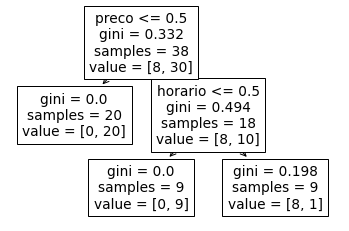

In [22]:
#Arvore completa
from sklearn import tree
tree.plot_tree(modelo,feature_names=x.columns,max_depth=2);

**Figura mostra assim como no cálculo da impureza do índice Gini que os dados não são 100% puros, porém apenas 1 dado ficou sem ser explicado**

**Também podemos observamos graficamente que quando o preço for menor do que 3000 mil não haverá fraude e precisamos de outra(s) variavel para explicar a variável preço quando ela for maior que 3000 mil, pois ainda faltam 18 dados que não foram explicados**

# Conclusão:

**Primeiramente calculamos a entropia da variável target e após o cálculo do nó raiz ainda sobrou alguns dados a serem explicados, portanto foi feito novamente o cálculo para saber qual variavel seria o 2° nó , como só temos 2 variáveis neste caso não precisaria do cálculo ,mesmo com o 2° nó os dados não foram 100% explicados, e como não temos mais variáveis o modelo fica sem explicar em 100% uma das classes, porém para conseguir chegar em 100% da explicação dos dados em relação a variável target, teríamos que adicionar outra variavel explicativa , contudo poderíamos ter problemas com overfitting**